<p style="font-size:20px">Prezentacja - Keras, Mateusz Rogowski</p>

# Keras

![BG9G6VAKJKGVTEUGDORQM1XBEK4DBOO1s.png](files/attachments/BG9G6VAKJKGVTEUGDORQM1XBEK4DBOO1s.png)

<p style="font-size: 2em; line-height: 1em;">Keras is a high-level neural networks API, written in Python and capable of running on top of</p>
<b><ul style="font-size: 2em; line-height: 1em;"><li>TensorFlow,</li>
   <li>CNTK,</li>
    <li>Theano.</li></ul></b>
<p style="font-size: 2em; line-height: 1em;">It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.</p>

## Layers
---
* Dense
* Activation
* Dropout
* Flatten
* Conv1D
* Conv2D
* Conv3D
* UpSampling
* ZeroPadding
* MaxPooling
* LocallyConnected
* RNN
* LSTM
* Embedding

## Optimizers
---
* SGD
* RMSprop
* Adagrad
* Adadelta
* Adam
* Adamax
* Nadam
* TFOptimizer

## Activations
---
* softmax
* elu
* relu
* tanh
* sigmoid
* linear

## Install - using pip

### Install TensorFlow
---
https://www.tensorflow.org/install/install_linux

```pip install tensorflow```

```pip install tensorflow-gpu```

### Install Keras
---
```pip install keras```

# Load data

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import metrics

In [2]:
data_path = '/data/MNIST/'
train_csv = os.path.join(data_path, 'train.csv')
test_csv = os.path.join(data_path, 'test.csv')

In [3]:
train = pd.read_csv(train_csv)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test = pd.read_csv(test_csv)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.shape

(28000, 784)

# Check input data 2D

In [7]:
test.loc[0, 'pixel0':].values.reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  17,  17,
         17,  17,  81, 180, 180,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 253,
        253, 253, 253, 253, 253,  48,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
for line in test.loc[0, 'pixel0':].astype(str).str.zfill(3).values.reshape(28, 28):
    print(' '.join(line))

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 010 017 017 017 017 081 180 180 035 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 139 253 253 253 253 253 253 253 048 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 060 228 253 253 253 253 253 253 253 207 197 046 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 213 253 253 253 253 253 253 253 253 253 253 223 052 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 066 231 253 253 253 108 040 040 115 244 253 253 134 003 000 000 000 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def display_digit(data_line):
    print("Digit class:", data_line.get('label', "X"))
    digit = data_line['pixel0':].values.reshape(28, 28)
    plt.figure(figsize=(5,5))
    plt.imshow(digit)

Digit class: X


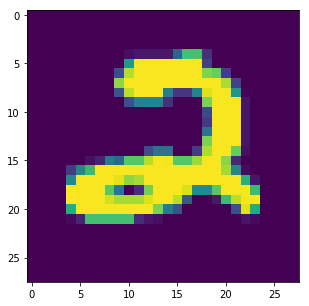

In [11]:
display_digit(test.loc[0])

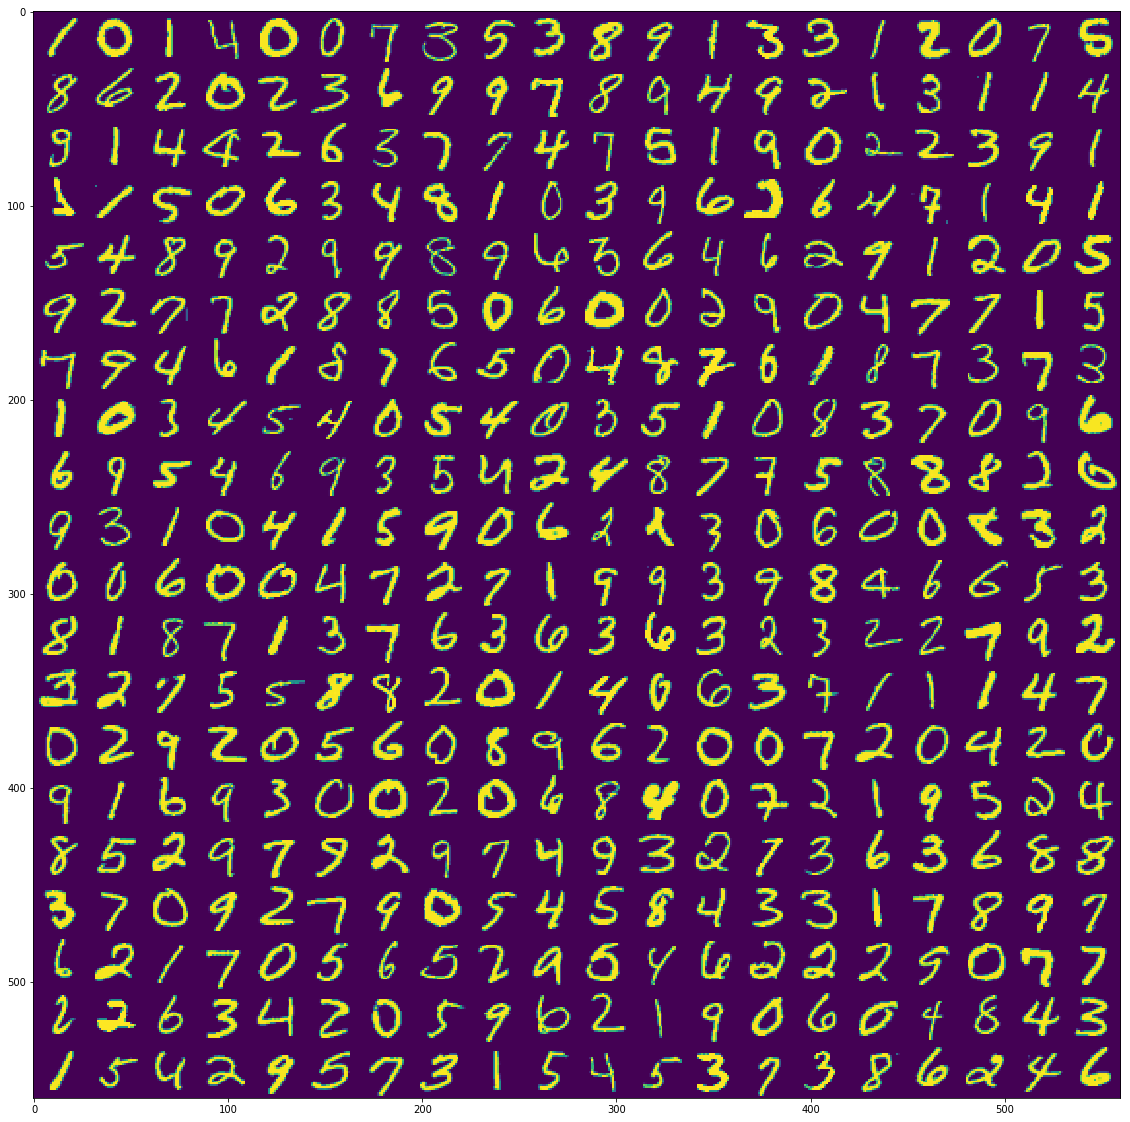

In [12]:
side_size = 20
size = side_size**2
im_size = 28
temp= train.iloc[:size].loc[:, 'pixel0':].values

images = np.concatenate([np.concatenate(e, axis=1) 
                         for e in temp.reshape(side_size,side_size,im_size,im_size)],
                        axis=0)

plt.figure(figsize=(20,20))
plt.imshow(images)

Digit class: 7


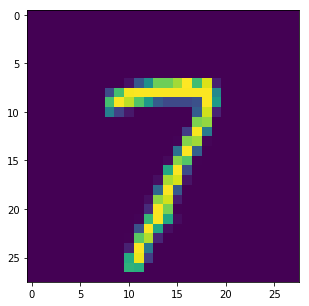

In [13]:
display_digit(train.iloc[18])

# Prepare data

In [14]:
from sklearn import preprocessing

In [15]:
X = train.loc[:,'pixel0':].values
y = train['label'].values
y_binarized = preprocessing.label_binarize(y, np.arange(10))

## Rescale data
---
X is in range 0:255. Algorithms such as Neural Networks work better with data with mean 0 and variance of 1.

In [16]:
from sklearn import preprocessing

In [17]:
X = preprocessing.scale(X)

/home/mrogowski/Projects/kaggle/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X.mean()

7.3903603245744672e-19

In [19]:
X.std()

0.95029533540357591

## Train test split

In [20]:
from sklearn import model_selection
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=.3, random_state=0)
train_idx, test_idx = list(sss.split(X, y))[0]

X_train, y_train, y_binarized_train = X[train_idx], y[train_idx], y_binarized[train_idx]
X_test, y_test, y_binarized_test = X[test_idx], y[test_idx], y_binarized[test_idx]

# Prepare model - Sequential dense connected model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GaussianDropout

Using TensorFlow backend.


In [22]:
output_size = y_binarized.shape[1]
input_size = X.shape[1]

## Prepare model

In [23]:
from keras import callbacks
from keras.utils.generic_utils import Progbar

class CustomProgbarLogger(callbacks.ProgbarLogger):
    '''Callback that prints metrics to stdout.
    '''
    def __init__(self, count_mode='samples', step_size=1):
        self.step_size=step_size
        super().__init__(count_mode)
    
    def on_train_begin(self, logs={}):
        self.verbose = self.verbose_bak = self.params['verbose'] or 1
        self.epochs = self.params['epochs']

    def on_epoch_begin(self, epoch, logs={}):
        self.verbose = self.verbose_bak & (((epoch % self.step_size) == 0) | (epoch == (self.epochs-1)))
        super().on_epoch_begin(epoch, logs)

In [24]:
def build_model():
    model = Sequential()
    model.add(Dense(256, batch_input_shape=(None, input_size,))) # Input dimensions
    model.add(Activation('tanh'))
    model.add(Dropout(0.35))
    model.add(Dense(128))
    model.add(Activation('tanh'))
    model.add(Dropout(0.45))
    model.add(GaussianDropout(0.25))
    model.add(Dense(32))
    model.add(Activation('tanh'))
    model.add(Dropout(0.45))
    model.add(Dense(output_size)) # number of classes
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=["accuracy"])
    
    return model

In [25]:
model = build_model()

### Display model structure

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
gaussian_dropout_1 (Gaussian (None, 128)               0         
__________

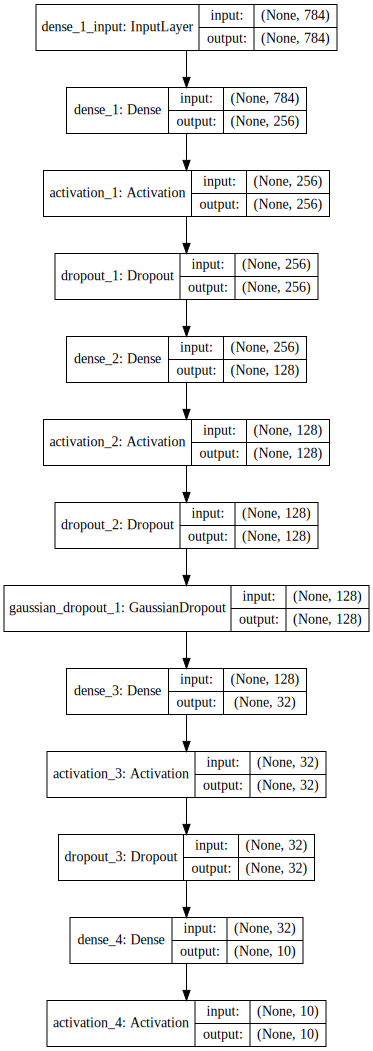

In [32]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Train model

## Train with default generator

In [33]:
batch_size = 2048
nb_epoch = 400
nb_val_samples = X_test.shape[0] - X_test.shape[0]%batch_size
validation_steps = X_test.shape[0]//batch_size
model = build_model()

In [34]:
history = model.fit(x=X_train,
                    y=y_binarized_train,
                    epochs=nb_epoch, 
                    steps_per_epoch=X_train.shape[0]//batch_size,
                    validation_data=(X_test, y_binarized_test),
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[CustomProgbarLogger(count_mode="steps", step_size=20)])

Epoch 1/400
14/14 [==============================] - 1s 106ms/step - loss: 1.2804 - acc: 0.5948 - val_loss: 0.4620 - val_acc: 0.8712
Epoch 21/400
14/14 [==============================] - 1s 60ms/step - loss: 0.0871 - acc: 0.9755 - val_loss: 0.1897 - val_acc: 0.9577
Epoch 41/400
14/14 [==============================] - 1s 55ms/step - loss: 0.0370 - acc: 0.9895 - val_loss: 0.2035 - val_acc: 0.9621
Epoch 61/400
14/14 [==============================] - 1s 57ms/step - loss: 0.0217 - acc: 0.9938 - val_loss: 0.2265 - val_acc: 0.9618
Epoch 81/400
14/14 [==============================] - 1s 57ms/step - loss: 0.0153 - acc: 0.9955 - val_loss: 0.2402 - val_acc: 0.9625
Epoch 101/400
14/14 [==============================] - 1s 58ms/step - loss: 0.0117 - acc: 0.9967 - val_loss: 0.2528 - val_acc: 0.9621
Epoch 121/400
14/14 [==============================] - 1s 60ms/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.2592 - val_acc: 0.9621
Epoch 141/400
14/14 [==============================] - 1s 56ms/step

## Train with custom generator

In [36]:
# define batch generator for fit_generator function, because whole dense dataset convered from sparse matrix won't fit into memory
def batch_generator(x,y,batch_size):
    number_of_batches = x.shape[0]//batch_size
    shuffle_index = np.arange(y.shape[0])
    while 1:
        np.random.shuffle(shuffle_index)
        x = x[shuffle_index]
        y = y[shuffle_index]
        for i in range(number_of_batches):
            yield (x[i*batch_size:(i+1)*batch_size], y[i*batch_size:(i+1)*batch_size])
            
def batch_predict_generator(x,batch_size):
    number_of_batches = x.shape[0]//batch_size
    while 1:
        for i in range(number_of_batches):
            print("Bath {0}/{1}".format(i, number_of_batches))
            yield x[i*batch_size:(i+1)*batch_size]

In [37]:
batch_size = 2048
nb_epoch = 400
nb_val_samples = X_test.shape[0] - X_test.shape[0]%batch_size
validation_steps = X_test.shape[0]//batch_size
model = build_model()

In [38]:
history = model.fit_generator(generator=batch_generator(X_train, y_binarized_train, batch_size),
                                epochs=nb_epoch, 
                                steps_per_epoch=X_train.shape[0]//batch_size,
                                validation_data=batch_generator(X_test, y_binarized_test, batch_size),
                                validation_steps=validation_steps,
                                verbose=0,
                                callbacks=[CustomProgbarLogger(count_mode="steps", step_size=20)])

Epoch 1/400
14/14 [==============================] - 0s 33ms/step - loss: 1.4206 - acc: 0.5383 - val_loss: 0.5483 - val_acc: 0.8526
Epoch 21/400
14/14 [==============================] - 0s 8ms/step - loss: 0.2135 - acc: 0.9403 - val_loss: 0.2052 - val_acc: 0.9460
Epoch 41/400
14/14 [==============================] - 0s 8ms/step - loss: 0.1235 - acc: 0.9657 - val_loss: 0.1812 - val_acc: 0.9560
Epoch 61/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0886 - acc: 0.9751 - val_loss: 0.1866 - val_acc: 0.9596
Epoch 81/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0663 - acc: 0.9807 - val_loss: 0.2003 - val_acc: 0.9596
Epoch 101/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0525 - acc: 0.9847 - val_loss: 0.2066 - val_acc: 0.9608
Epoch 121/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0454 - acc: 0.9857 - val_loss: 0.2169 - val_acc: 0.9609
Epoch 141/400
14/14 [==============================] - 0s 8ms/step - loss:

## Plot learning curve

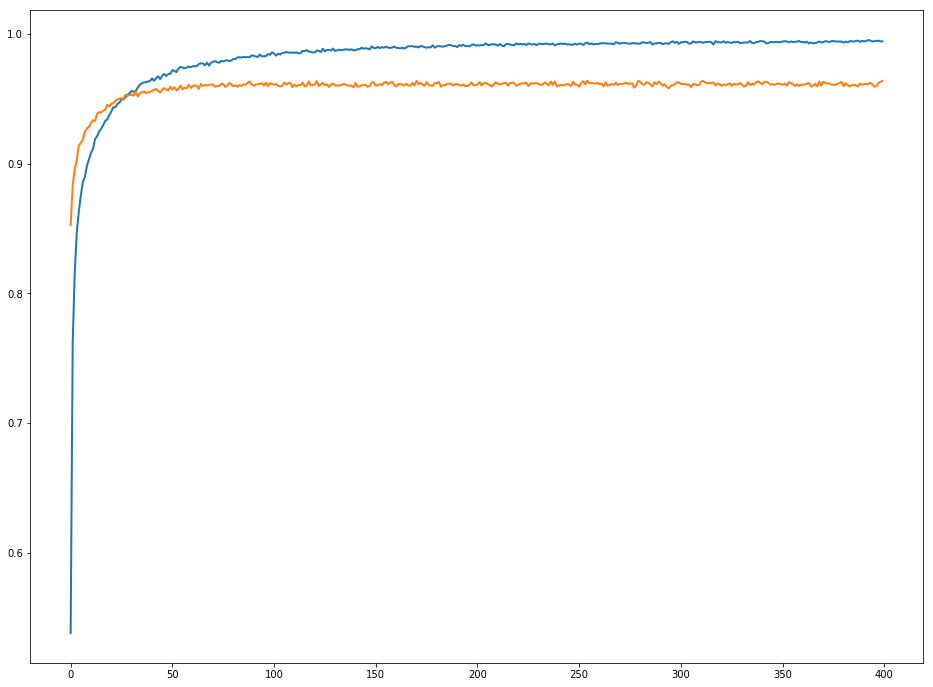

In [41]:
plt.figure(figsize=(16,12))
plt.plot(history.history['acc'], linewidth=2.0)
plt.plot(history.history['val_acc'], linewidth=2.0)

# Test model

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
predictions

array([3, 2, 1, ..., 0, 0, 9])

In [54]:
metrics.accuracy_score(y_test, predictions)

0.96031746031746035

In [55]:
print(metrics.classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1240
          1       0.99      0.98      0.98      1405
          2       0.96      0.94      0.95      1253
          3       0.94      0.95      0.95      1305
          4       0.95      0.96      0.96      1222
          5       0.96      0.95      0.95      1139
          6       0.97      0.98      0.97      1241
          7       0.95      0.96      0.95      1320
          8       0.96      0.95      0.96      1219
          9       0.94      0.94      0.94      1256

avg / total       0.96      0.96      0.96     12600



In [60]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)

pd.DataFrame(conf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,1213,1,1,2,4,4,11,0,4,0
1,0,1382,8,2,4,1,1,3,4,0
2,9,3,1175,18,6,2,7,18,12,3
3,0,2,15,1246,1,14,1,13,8,5
4,2,1,5,1,1177,2,11,0,2,21
5,5,1,1,21,3,1081,7,2,5,13
6,5,2,4,0,3,5,1215,3,4,0
7,1,4,14,4,10,2,0,1270,1,14
8,1,4,5,14,7,13,1,3,1157,14
9,1,3,2,11,18,5,1,29,2,1184
